Scarica il file penguins_size.csv.

Addestra una foresta casuale che sia in grado di predire simultaneamente specie e sesso dei pinguini.

Ti suggeriamo di creare una nuova colonna nel dataframe che contenga una categoria ottenuta combinando specie e sesso, in totale avrai sei categorie.

Procedi come nel paragrafo 5:
- carica e pulisci i dati;
- suddividi i dati in insiemi di training e di test;
- addestra la foresta casuale;
- calcola le accuratezze sui dati di test e di training;
- valuta il modello rispetto alla profondità massima degli alberi max_depth ed eventualmente miglioralo;
- stampa l’importanza delle feature.

In [1]:
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [29]:
data = pd.read_csv("./penguins_size.csv")
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [31]:
data.dropna(inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [33]:
features = ["island", "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
target = ["species", "sex"]

In [44]:
dati_features = data[features]
dati_features

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,Torgersen,39.1,18.7,181.0,3750.0
1,Torgersen,39.5,17.4,186.0,3800.0
2,Torgersen,40.3,18.0,195.0,3250.0
4,Torgersen,36.7,19.3,193.0,3450.0
5,Torgersen,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,Biscoe,47.2,13.7,214.0,4925.0
340,Biscoe,46.8,14.3,215.0,4850.0
341,Biscoe,50.4,15.7,222.0,5750.0
342,Biscoe,45.2,14.8,212.0,5200.0


In [45]:
# conversione featuers qualitative in features quantitative

tipi_isole = dati_features["island"].unique()

for i, isola in enumerate(tipi_isole):
    dati_features.replace(isola, i, inplace=True)

dati_features

/home/gabriele/Applicazioni/Anaconda3/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,39.1,18.7,181.0,3750.0
1,0,39.5,17.4,186.0,3800.0
2,0,40.3,18.0,195.0,3250.0
4,0,36.7,19.3,193.0,3450.0
5,0,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
338,1,47.2,13.7,214.0,4925.0
340,1,46.8,14.3,215.0,4850.0
341,1,50.4,15.7,222.0,5750.0
342,1,45.2,14.8,212.0,5200.0


In [46]:
dati_target = data[target]
dati_target

,species,sex
0,Adelie,MALE
1,Adelie,FEMALE
2,Adelie,FEMALE
4,Adelie,FEMALE
5,Adelie,MALE
...,...,...
338,Gentoo,FEMALE
340,Gentoo,FEMALE
341,Gentoo,MALE
342,Gentoo,FEMALE


In [47]:
dati_target_concatenati = dati_target["species"] + " " + dati_target["sex"]
dati_target_concatenati

0        Adelie MALE
1      Adelie FEMALE
2      Adelie FEMALE
4      Adelie FEMALE
5        Adelie MALE
           ...      
338    Gentoo FEMALE
340    Gentoo FEMALE
341      Gentoo MALE
342    Gentoo FEMALE
343      Gentoo MALE
Length: 334, dtype: object

In [48]:
X = dati_features.values
y = dati_target_concatenati.values

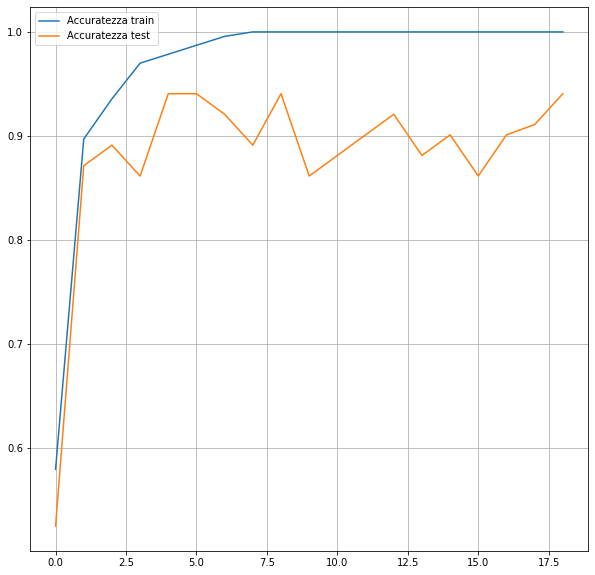

In [49]:
accs_train = []
accs_test = []

for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
    foresta = RandomForestClassifier(max_depth=i, n_estimators=100)
    foresta.fit(X_train, y_train)
    accs_train.append(foresta.score(X_train, y_train))
    accs_test.append(foresta.score(X_test, y_test))
    

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(accs_train, label="Accuratezza train")
ax.plot(accs_test, label="Accuratezza test")
ax.legend()
ax.grid()
plt.show()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
foresta = RandomForestClassifier(max_depth=18, n_estimators=100)
foresta.fit(X_train, y_train)

RandomForestClassifier(max_depth=18)

Feature: 0, Score: 0.05323
Feature: 1, Score: 0.32657
Feature: 2, Score: 0.21697
Feature: 3, Score: 0.17409
Feature: 4, Score: 0.22914


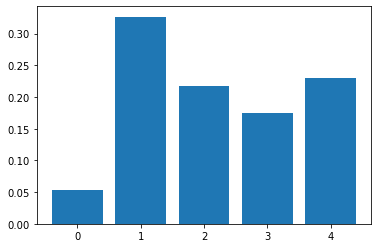

In [52]:
# get importance
importance = foresta.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()